# Testing GRCWA vs TROCWA implementations of twobox


In [2]:
import sys
# sys.path.append('../')
from Dynamics.SR_functions import Parameters, erf
from parameters import D1_ND, Parameters
from twobox import TwoBox
import numpy as np
import matplotlib.pyplot as plt
import agfunc 
import torch
import time
npa=agfunc.agfunc('torch')
npaa=agfunc.agfunc('autograd')

# Testing torch autograd

In [3]:
def f(x):
    return (npa.sin(x[0])*x[1]**2)
def fag(x):
    return (npaa.sin(x[0])*x[1]**2)
# g=npa.grad(f)
print(agfunc.grad_torch_value(f,npa.array([-1.0,4])),np.cos(-1.0),-1.0*4*2)
print(npa.grad(f)(npa.array([-1.0,4]))[0].detach().numpy(),np.cos(-1.0),-1.0*4*2)
print(npaa.grad(fag)(npaa.array([-1.0,4])),np.cos(-1.0),-1.0*4*2)
# print(g(2.0))
x=npa.array(3.0)
#print(agfunc.grad_torch_value(f,x))
# print(f(x))
# print(np.sin(x.detach().cpu().numpy()))
y=3*x
z=y**2
print(torch.autograd.grad(z,x,create_graph=True))
print(torch.autograd.grad(y,x))

(tensor([ 8.6448, -6.7318], grad_fn=<AddBackward0>),) 0.5403023058681398 -8.0
[ 8.644837  -6.7317677] 0.5403023058681398 -8.0
[ 8.64483689 -6.73176788] 0.5403023058681398 -8.0
(tensor(54., grad_fn=<MulBackward0>),)
(tensor(3.),)


In [4]:
a = torch.tensor(1., requires_grad=True)
b = a**2
c = 5*b
c.backward()
print(a.grad)  # Prints: 10.

tensor(10.)


# Testing show spectrum method


Torcwa time =  5.6521594524383545
GRCWA time =  2.9737207889556885


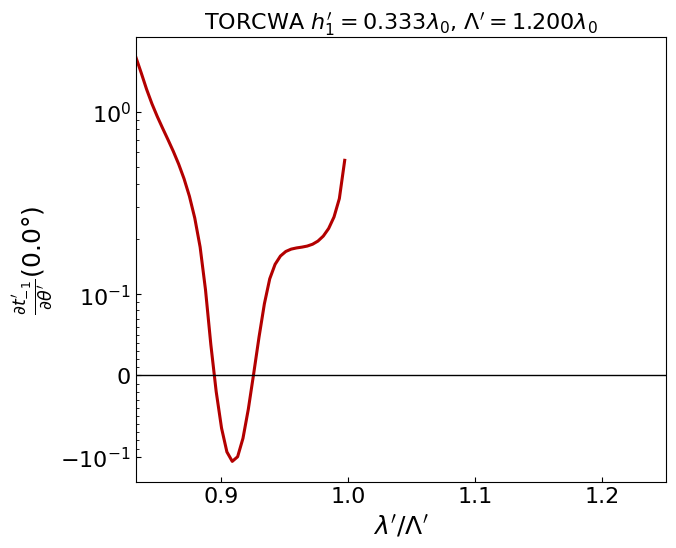

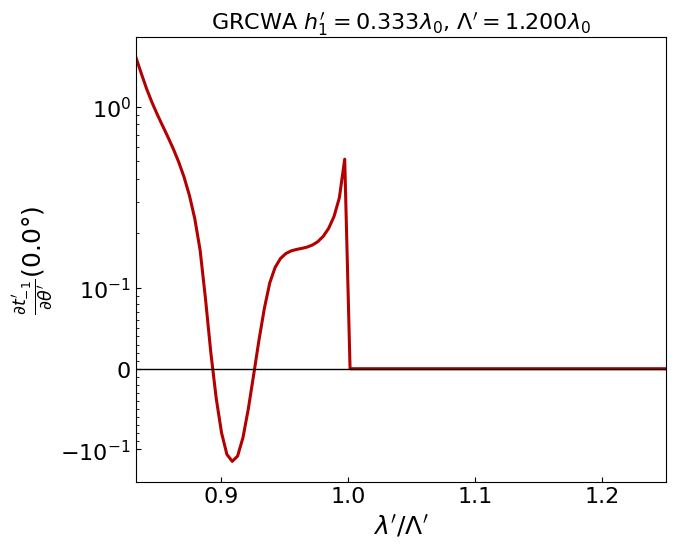

In [5]:
wavelength      = 1.5 #/ D1_ND(1.2/100)
grating_pitch   = 1.8 / wavelength
grating_depth   = 0.5 / wavelength
box1_width      = 0.15 * grating_pitch
box2_width      = 0.35 * grating_pitch
box_centre_dist = 0.60 * grating_pitch
box1_eps        = 3.5**2 
box2_eps        = 3.5**2
gaussian_width  = 2* 10   # 2.7180049942915896 * 10
substrate_depth = 0.5 / wavelength
substrate_eps   = 1.45**2

wavelength      = 1.
angle           = 0.
Qabs            = np.inf
numpoints=50
numG=25
Nx=300
gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='TORCWA')
start_time=time.time()
# gratingTorcwa.show_spectrum(efficiency_quantity='eig',num_plot_points=numpoints)
gratingTorcwa.show_spectrum(efficiency_quantity='PDt',num_plot_points=100)
print('Torcwa time = ',time.time()-start_time)

start_time=time.time()
gratingGRCWA = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='GRCWA')
# gratingGRCWA.show_spectrum(efficiency_quantity='eig',num_plot_points=numpoints)
gratingGRCWA.show_spectrum(efficiency_quantity='PDt',num_plot_points=100)
print('GRCWA time = ',time.time()-start_time)


# Ilic grating

In [6]:
 ## Ilic
wavelength      = 1.5 #/ D1_ND(1.2/100)
grating_pitch   = 1.8 / wavelength
grating_depth   = 0.5 / wavelength
box1_width      = 0.15 * grating_pitch
box2_width      = 0.35 * grating_pitch
box_centre_dist = 0.60 * grating_pitch
box1_eps        = 3.5**2 
box2_eps        = 3.5**2
gaussian_width  = 2* 10   # 2.7180049942915896 * 10
substrate_depth = 0.5 / wavelength
substrate_eps   = 1.45**2

wavelength      = 1.
angle           = 0.
Nx              = 300
numG            = 12
Qabs            = np.inf

gratingGRCWA = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='GRCWA')
numGTorcwa = numG
gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numGTorcwa, Qabs, RCWA_engine='TORCWA',torcwa_edge_sharpness=40)

### plot epsilon 

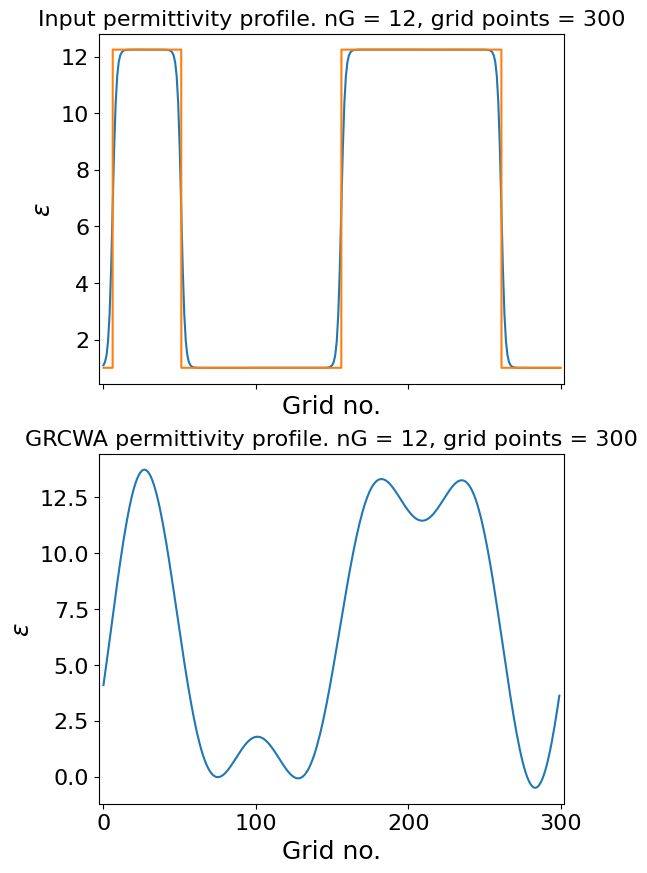

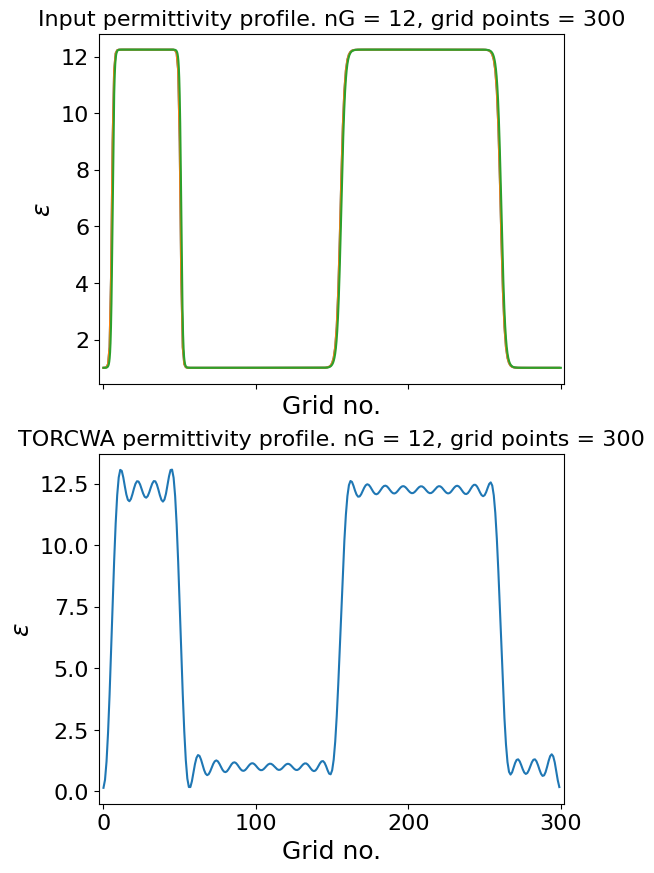

(array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032,
        0.036, 0.04 , 0.044, 0.048, 0.052, 0.056, 0.06 , 0.064, 0.068,
        0.072, 0.076, 0.08 , 0.084, 0.088, 0.092, 0.096, 0.1  , 0.104,
        0.108, 0.112, 0.116, 0.12 , 0.124, 0.128, 0.132, 0.136, 0.14 ,
        0.144, 0.148, 0.152, 0.156, 0.16 , 0.164, 0.168, 0.172, 0.176,
        0.18 , 0.184, 0.188, 0.192, 0.196, 0.2  , 0.204, 0.208, 0.212,
        0.216, 0.22 , 0.224, 0.228, 0.232, 0.236, 0.24 , 0.244, 0.248,
        0.252, 0.256, 0.26 , 0.264, 0.268, 0.272, 0.276, 0.28 , 0.284,
        0.288, 0.292, 0.296, 0.3  , 0.304, 0.308, 0.312, 0.316, 0.32 ,
        0.324, 0.328, 0.332, 0.336, 0.34 , 0.344, 0.348, 0.352, 0.356,
        0.36 , 0.364, 0.368, 0.372, 0.376, 0.38 , 0.384, 0.388, 0.392,
        0.396, 0.4  , 0.404, 0.408, 0.412, 0.416, 0.42 , 0.424, 0.428,
        0.432, 0.436, 0.44 , 0.444, 0.448, 0.452, 0.456, 0.46 , 0.464,
        0.468, 0.472, 0.476, 0.48 , 0.484, 0.488, 0.492, 0.496, 0.5  ,
      

In [7]:
gratingGRCWA.show_permittivity(show_analytic_box=True)
gratingTorcwa.show_permittivity(show_analytic_box=True)

Edge effect vs edge sharpness parameter in torcwa

sharpness =  1


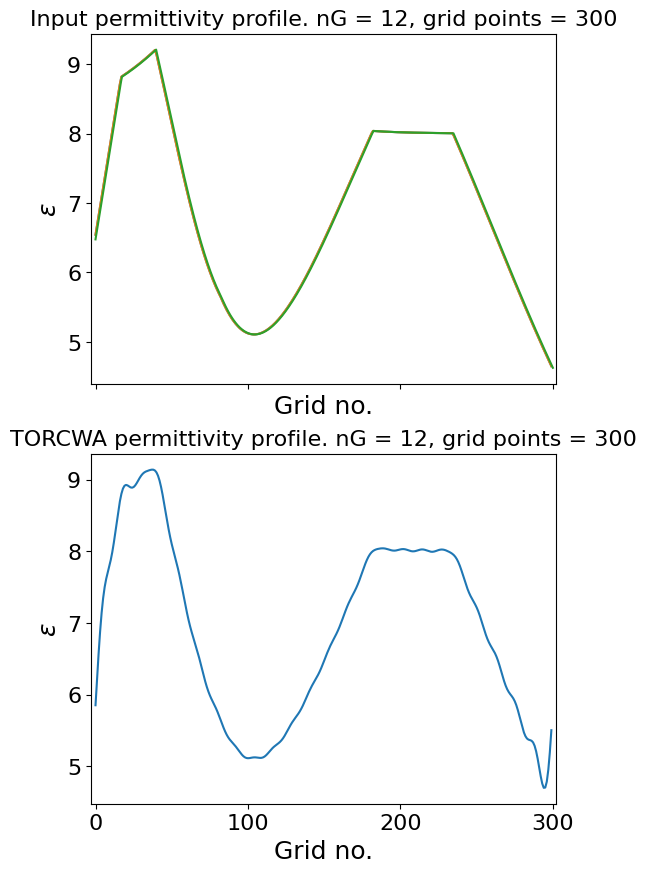

sharpness =  10


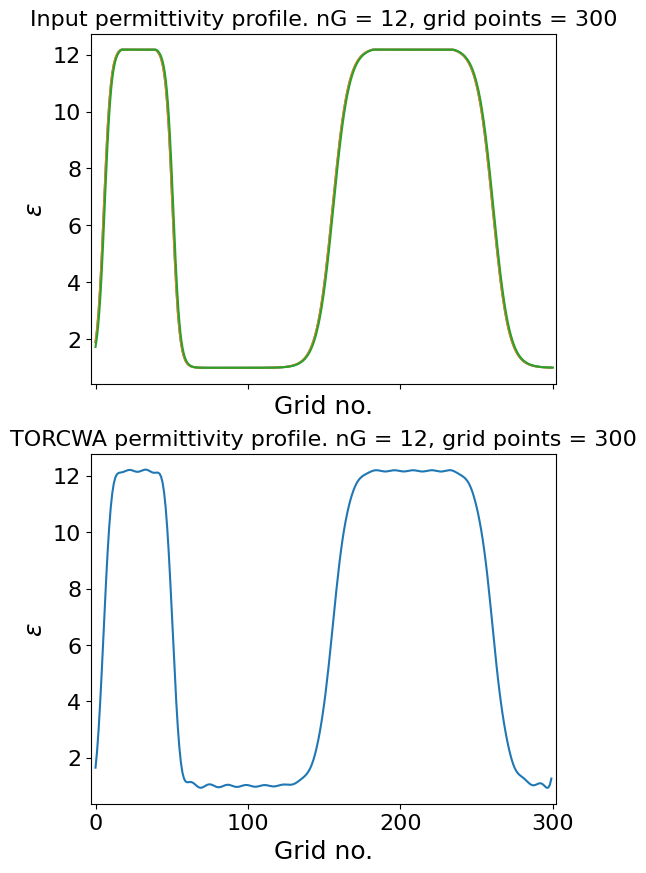

sharpness =  100


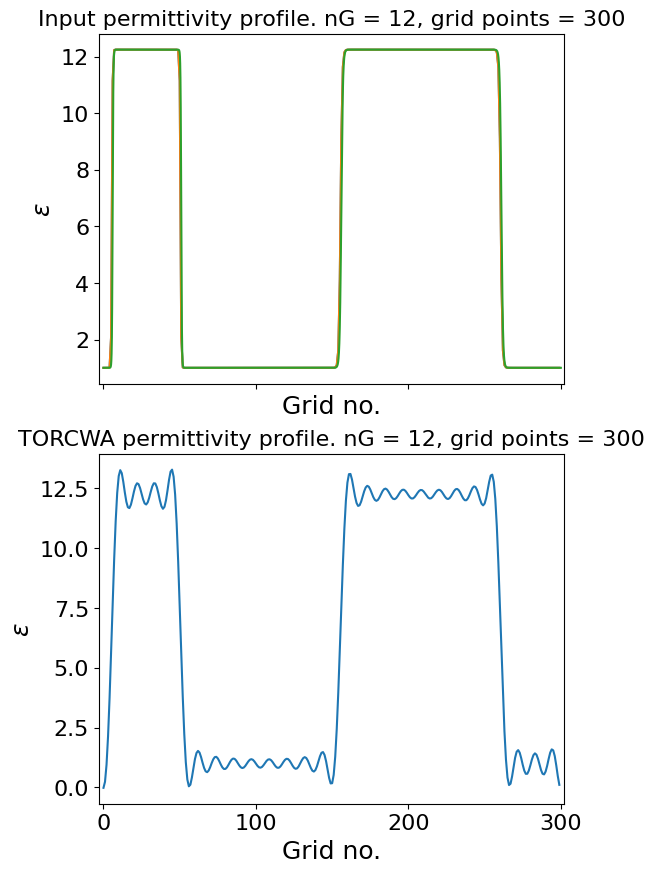

sharpness =  1000


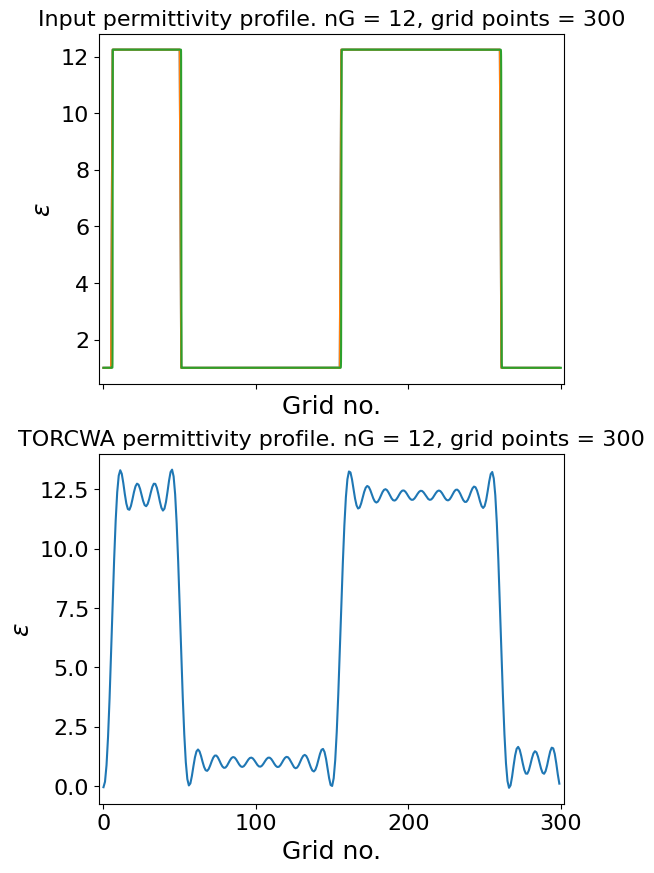

In [8]:
for sharp in np.array([1,10,100,1000]):
    gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='TORCWA',torcwa_edge_sharpness=sharp)
    print('sharpness = ',sharp)
    gratingTorcwa.show_permittivity(show_analytic_box=True)

## Fourier truncation effect in Torcwa
It seems much better at avoiding Gibbs phenomena than gRCWA, even with sharpness of 1000, surprising.

order =  3


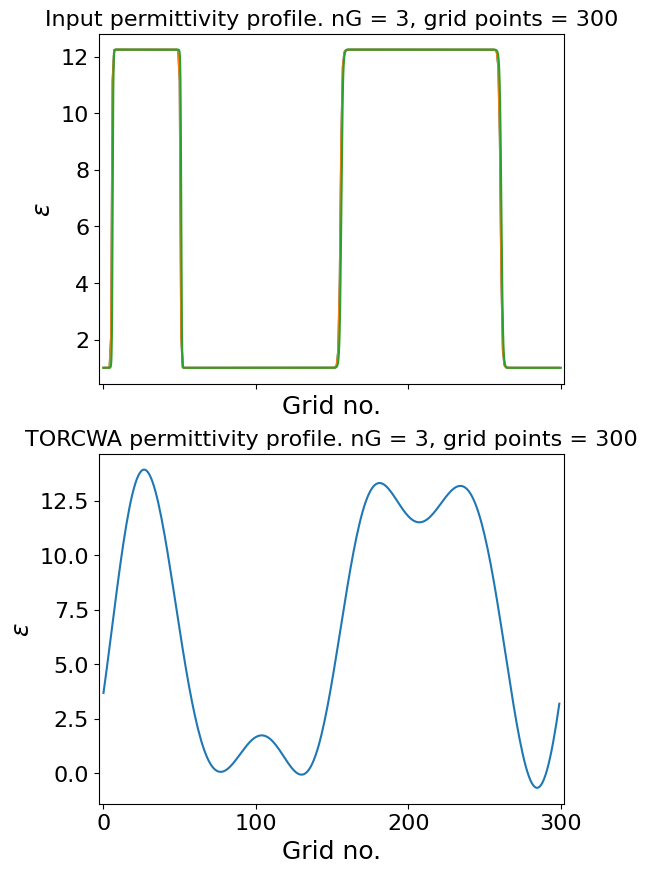

order =  10


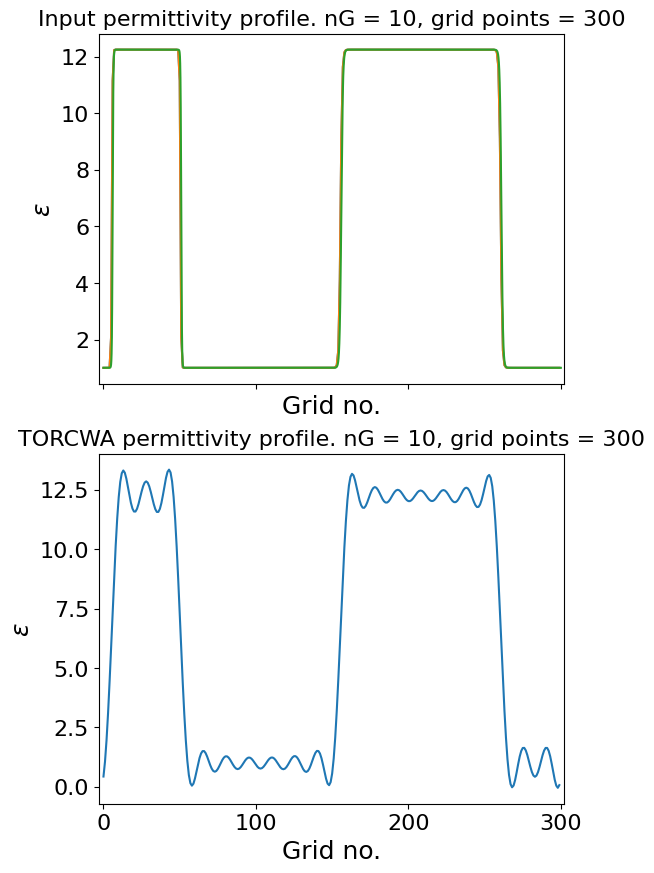

order =  25


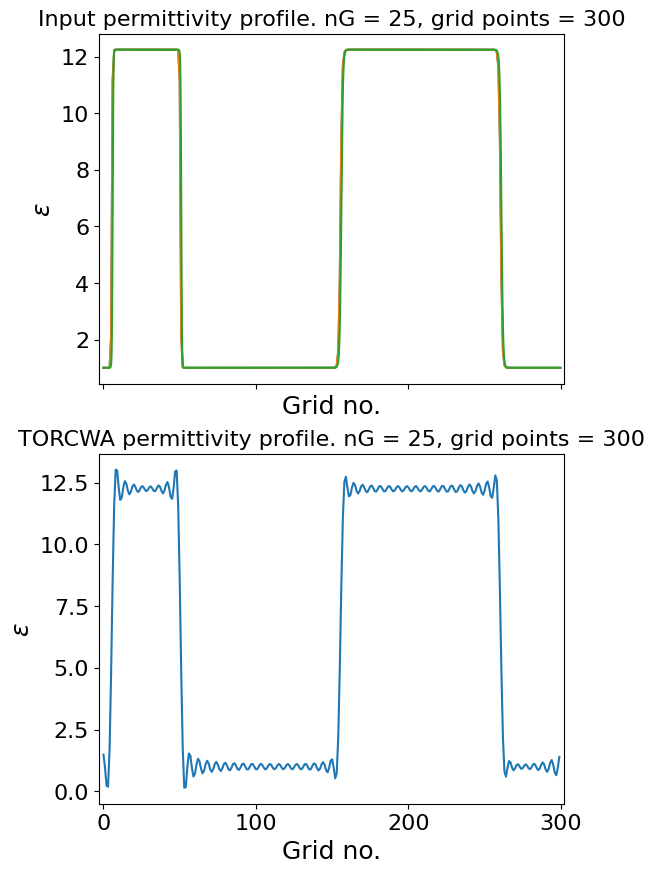

In [9]:
for order in np.array([3,10,25]):
    gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, order, Qabs, RCWA_engine='TORCWA',torcwa_edge_sharpness=100)
    print('order = ',order)
    gratingTorcwa.show_permittivity(show_analytic_box=True)

# R, T vs angle for Ilic


GRCWA time =  3.164862871170044
TORCWA time =  9.536970376968384


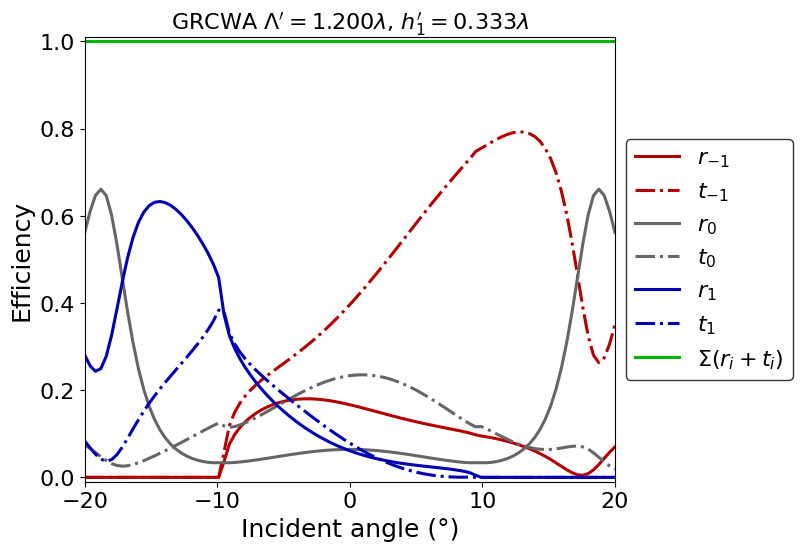

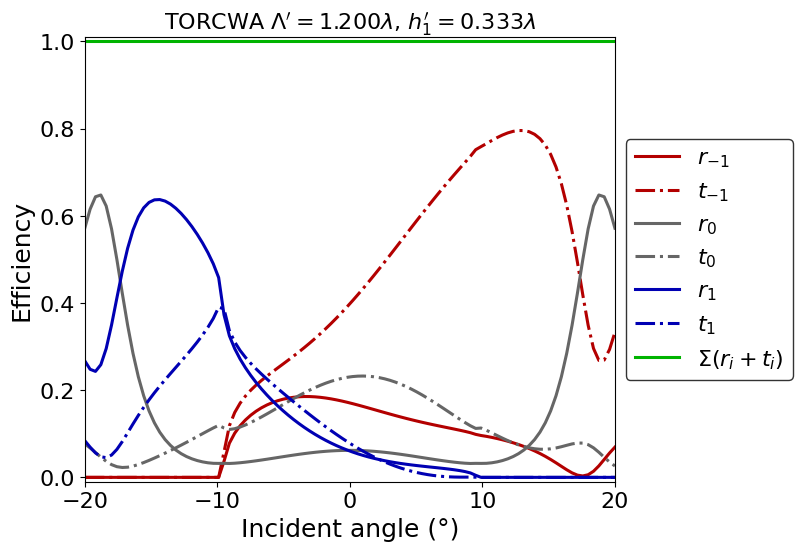

In [21]:
numG=50
Nx=300
import time
start = time.time()
gratingGRCWA = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='GRCWA')
gratingGRCWA.show_angular_efficiency()
print('GRCWA time = ',time.time()-start)
start = time.time()
numG=50
gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='TORCWA', torcwa_edge_sharpness=50)

gratingTorcwa.show_angular_efficiency()
print('TORCWA time = ',time.time()-start)

# Convergence test and timing TORCWA vs GRCWA


GRCWA time =  2.9390580654144287
TORCWA time =  6.752674579620361


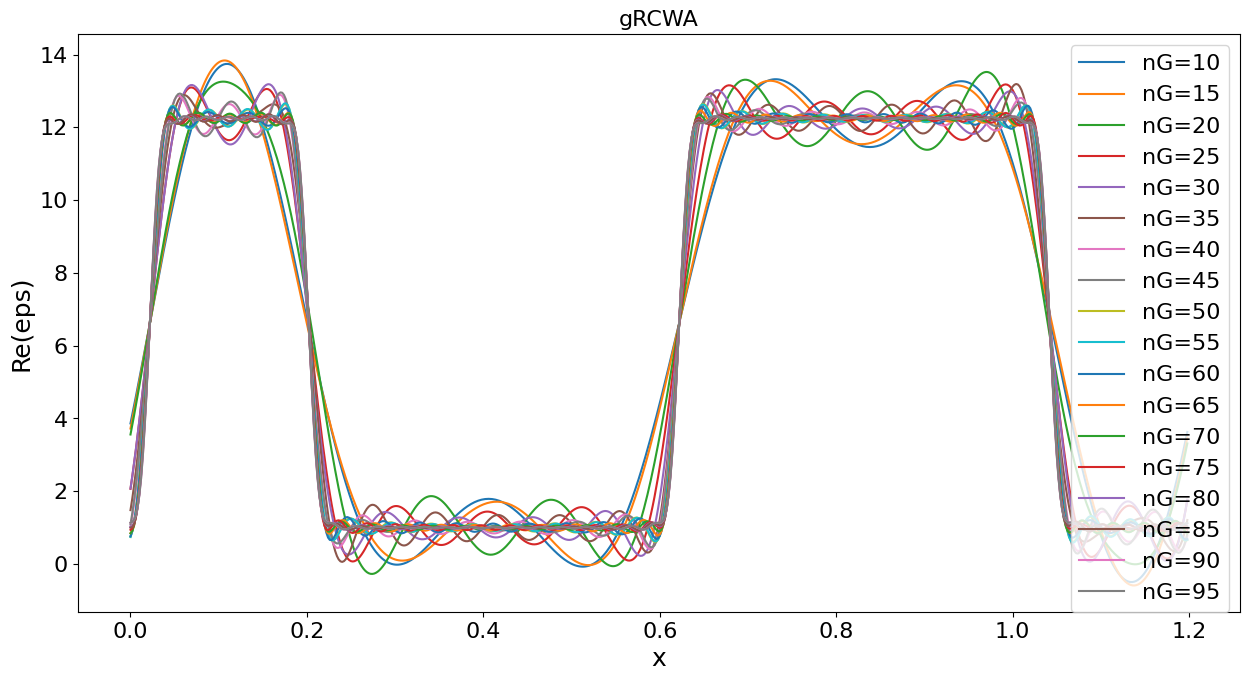

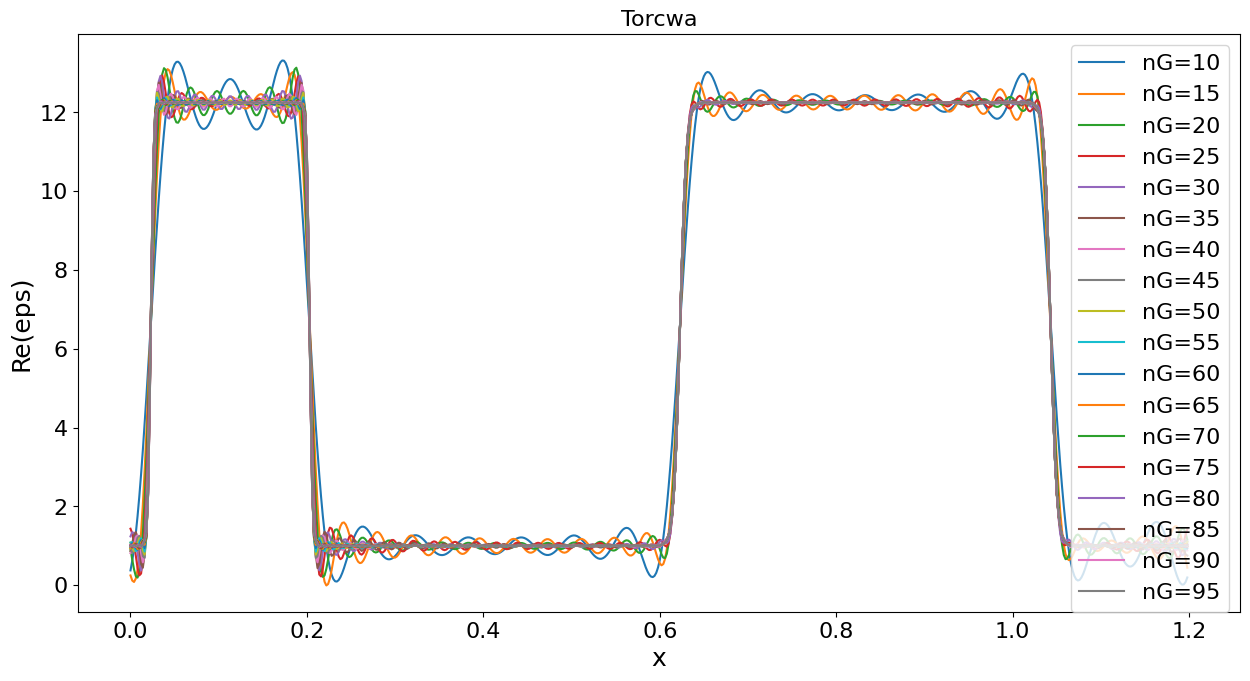

In [30]:

Nx=600
import time
start = time.time()
rGRCWA=[]
rTorcwa=[]
numRange=np.array(range(10,100,5))
plt.figure()
for lnumG in numRange:
    gratingGRCWA = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                    gaussian_width, substrate_depth, substrate_eps,
                    wavelength, angle, Nx, int(lnumG), Qabs, RCWA_engine='GRCWA')
    Rs,Ts=gratingGRCWA.eff()
    rGRCWA.append(Rs[1])
    x0,eps_array=gratingGRCWA.return_epsilon()
    plt.plot(x0,np.real(eps_array),label=f'nG={lnumG}')

print('GRCWA time = ',time.time()-start)
plt.legend()
plt.title('gRCWA')

plt.ylabel('Re(eps)')
plt.xlabel('x')

plt.figure()
start = time.time()
for lnumG in numRange:
    gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                    gaussian_width, substrate_depth, substrate_eps,
                    wavelength, angle, Nx, lnumG, Qabs, RCWA_engine='TORCWA',torcwa_edge_sharpness=60)
    Rs,Ts=gratingTorcwa.eff()    
    rTorcwa.append(Rs[1].detach().cpu().numpy())
    x0,eps_array=gratingTorcwa.return_epsilon()
    plt.plot(x0,np.real(eps_array),label=f'nG={lnumG}')


print('TORCWA time = ',time.time()-start)
plt.title('Torcwa')
plt.ylabel('Re(eps)')
plt.xlabel('x')
plt.legend()

Text(0.5, 0.98, 'RCWA vs TROCWA convergence, using float64/complex128 ')

<Figure size 1500x750 with 0 Axes>

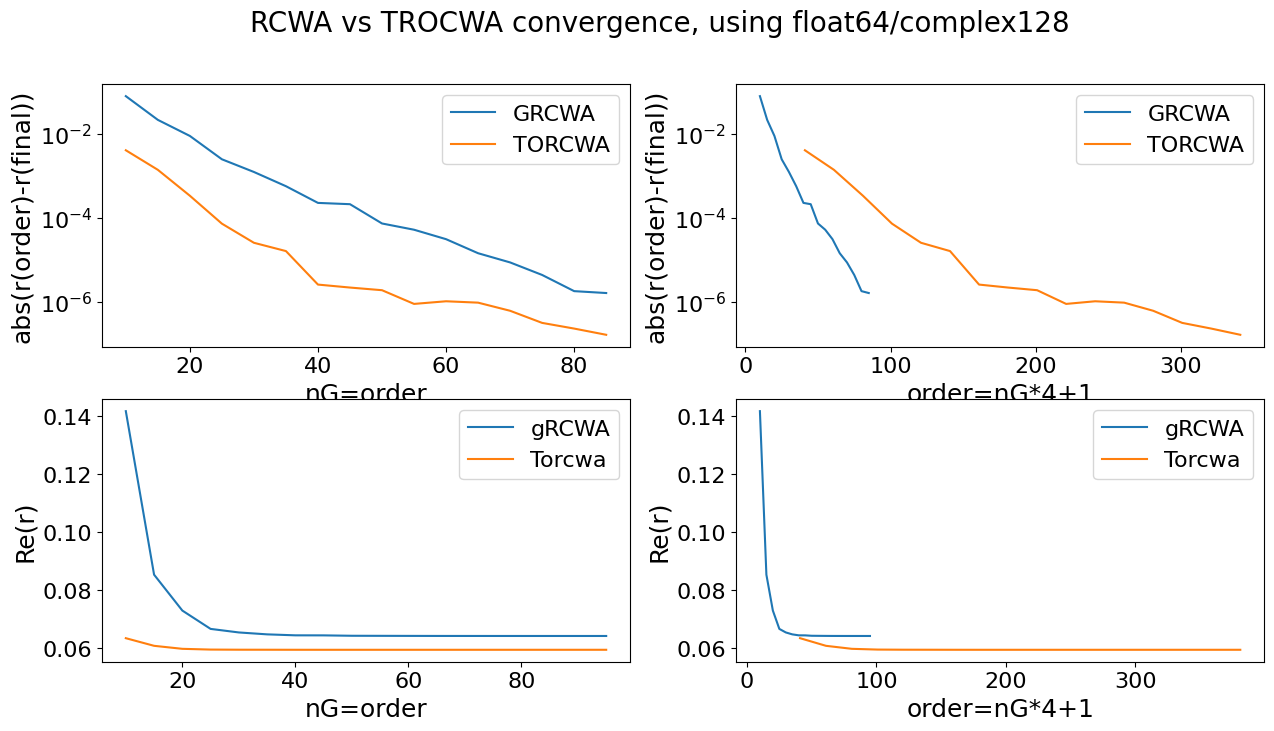

In [31]:


plt.figure()
fig,axs=plt.subplots(2,2)

axs[0,0].semilogy(numRange[0:-2],abs(np.array(rGRCWA[0:-2])-rGRCWA[-1]),label='GRCWA')
axs[0,0].semilogy(numRange[0:-2],abs(np.array(rTorcwa[0:-2])-rTorcwa[-1]),label='TORCWA')
axs[0,0].legend()
axs[0,0].set(xlabel='nG=order')
axs[0,0].set(ylabel='abs(r(order)-r(final))')


axs[1,0].plot(numRange,np.real(rGRCWA),label='gRCWA')
axs[1,0].plot(numRange,np.real(rTorcwa),label='Torcwa')
axs[1,0].legend()
axs[1,0].set(ylabel='Re(r)')
axs[1,0].set(xlabel='nG=order')

axs[0,1].semilogy(numRange[0:-2],abs(np.array(rGRCWA[0:-2])-rGRCWA[-1]),label='GRCWA')
axs[0,1].semilogy(4*numRange[0:-2]+1,abs(np.array(rTorcwa[0:-2])-rTorcwa[-1]),label='TORCWA')
axs[0,1].legend()
axs[0,1].set(xlabel='order=nG*4+1')
axs[0,1].set(ylabel='abs(r(order)-r(final))')


axs[1,1].plot(numRange,np.real(rGRCWA),label='gRCWA')
axs[1,1].plot(4*numRange+1,np.real(rTorcwa),label='Torcwa')
axs[1,1].legend()
axs[1,1].set(ylabel='Re(r)')
axs[1,1].set(xlabel='order=nG*4+1')
fig.suptitle('RCWA vs TROCWA convergence, using float64/complex128 ')

In [ ]:
Nx=600
import time

rGRCWA=[]
rTorcwa=[]
tTorcwa=[]
sharpnessRange=np.array(range(10,100,5))
plt.figure()
gratingGRCWA = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                gaussian_width, substrate_depth, substrate_eps,
                wavelength, angle, Nx, int(numG), Qabs, RCWA_engine='GRCWA')
Rs,Ts=gratingGRCWA.eff()
rGRCWA=Rs
tGRCWA=Ts



plt.figure()
for sharpness in sharpnessRange:
    gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                    gaussian_width, substrate_depth, substrate_eps,
                    wavelength, angle, Nx, numG, Qabs, RCWA_engine='TORCWA',torcwa_edge_sharpness=sharpness)
    Rs,Ts=gratingTorcwa.eff()    
    rTorcwa.append(Rs.detach().cpu().numpy())
    tTorcwa.append(Rs.detach().cpu().numpy())

rTorcwa=np.array(rTorcwa)
tTorcwa=np.array(tTorcwa)



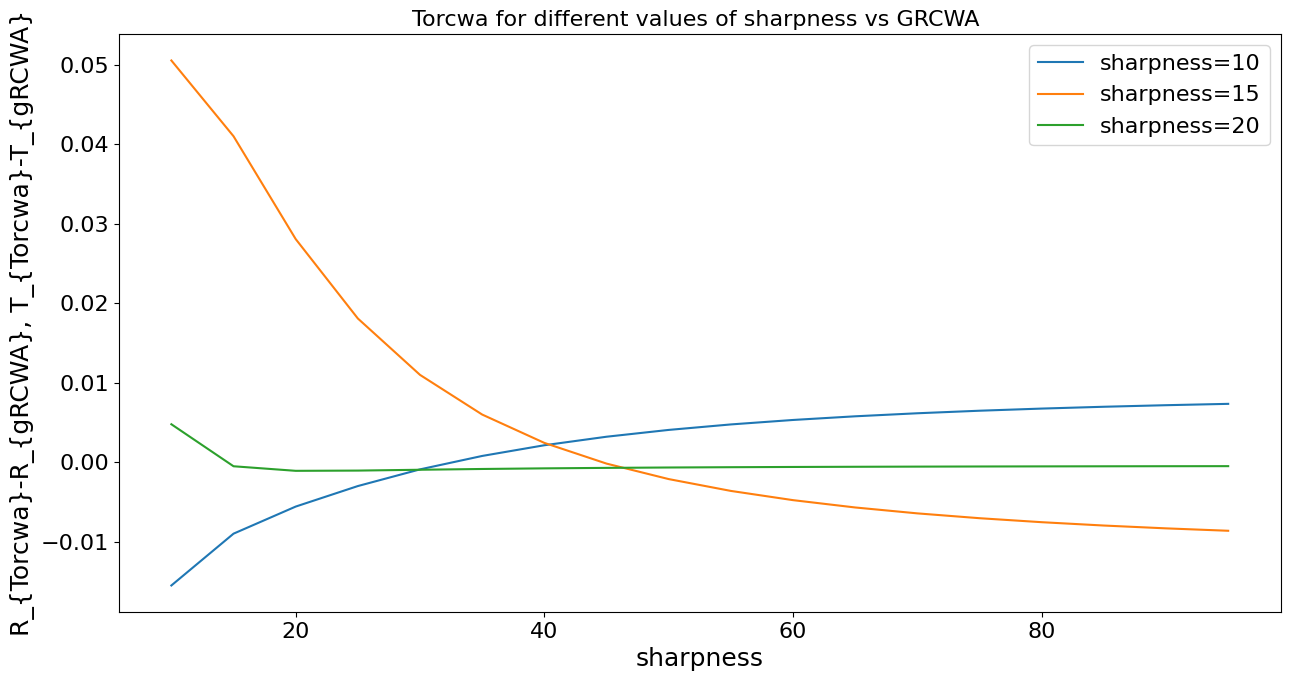

In [38]:
for j in range(len(rGRCWA)):
    plt.plot(sharpnessRange,rTorcwa[:,j]-rGRCWA[j],label=f'sharpness={sharpnessRange[j]}')

plt.title('Torcwa for different values of sharpness vs GRCWA ')
plt.ylabel(r'R_{Torcwa}-R_{gRCWA}, T_{Torcwa}-T_{gRCWA}')
plt.xlabel('sharpness')
plt.legend()